In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Dibujamos una figura

Opcion 3 usamnos subplots + Leyendas


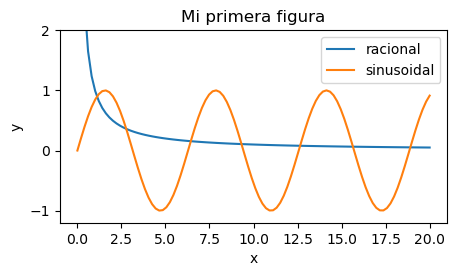

In [21]:
x = np.linspace(0.0001, 20, 100);   y, y2 = 1/x, np.sin(x)  # datos sintéticos
comments = {1:'Usamos Plot para crear una figura de un tamaño dado\n         A4:8.27x11.69',
            2:'usamos explícitamente el concepto de axis, agregamos\n         una grilla y formato',
            3:'usamnos subplots + Leyendas'}

opt = 3; 

if opt==1:                         # Definimos el tamaño 
    fig = plt.figure(figsize=(5,2.5))
    plt.plot(x,y); plt.plot(x,y2)
    plt.ylim(-1.2,2);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Mi primera figura');
    
elif opt==2:
    fig = plt.figure(figsize=(5,2.5))
    ax = plt.gca()                  # gca: get current axes
    ax.plot(x,y); ax.plot(x,y2)
    ax.set(xlim=(-1.2,2),xlabel='x',ylabel='y',title='Mi primera figura') 
    ax.tick_params(axis='x',which='major', labelsize=20,grid_color='r')
    ax.grid(True, linestyle='--', linewidth=0.5)

elif opt==3:                        # con subplots
    fig, ax = plt.subplots(figsize=(5,2.5))
    ax.plot(x,y,label='racional'); ax.plot(x,y2,label='sinusoidal')
    ax.set(ylim=(-1.2,2),xlabel='x',ylabel='y',title='Mi primera figura');
    ax.legend()

fig.savefig('fig1_'+str(opt)+'_.png')
print('Opcion',opt,comments[opt])

## Dibujamos Varias Figuras

### ¿Cómo trabajamos con subplot?

Opcion 4 Más compacto 2?


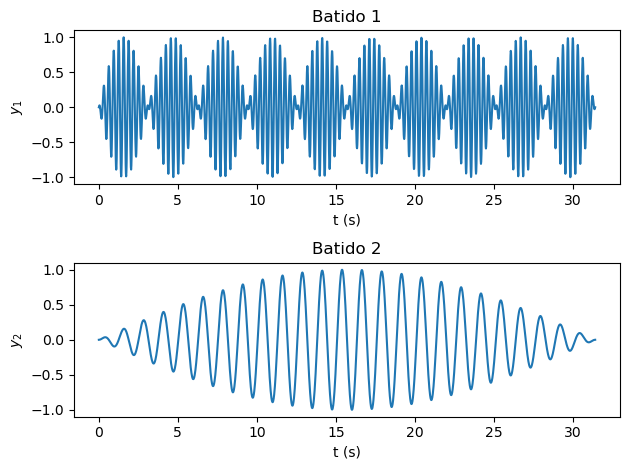

In [3]:
x = np.linspace(0,10*np.pi,2000);  y1, y2 = np.sin(x)*np.cos(20*x), np.sin(0.1*x)*np.sin(5*x)
comments = {1:'Creamos una figura y agregamos subplots',
            2:'Creamos un subplot, mas compacta',
            3:'Más compacto?',
            4:'Más compacto 2?'}

opt = 4

if 1:
    fig = plt.figure()           
    ax0 = fig.add_subplot(211)
    ax1 = fig.add_subplot(2,1,2) 
    ax0.plot(x,y1) 
    ax0.set_title('Batido 1')
    ax0.set_xlabel('t (s)')
    ax0.set_ylabel(r'$y_1$')
    ax1.plot(x,y2) 
    ax1.set_title('Batido 2')
    ax1.set_xlabel('t (s)')
    ax1.set_ylabel(r'$y_2$')
    
elif 2:
    fig, (ax0, ax1) = plt.subplots(2, 1)
    ax0.plot(x,y1) 
    ax0.set(title='Batido 1',xlabel='t (s)', ylabel=r'$y_1$')   
    ax1.plot(x,y2) 
    ax1.set(title='Batido 2',xlabel='t (s)', ylabel=r'$y_2$')  

elif 3:
    fig, axs = plt.subplots(2, 1)
    for ax,y,s in zip(axs,[y1,y2],['1','2']):
        ax.plot(x,y) 
        ax.set(title='Batido '+s,xlabel='t (s)', ylabel=r'$y_'+s+'$')   

elif 4:
    fig, axs = plt.subplots(2, 1)
    for i,y in enumerate([y1,y2]):
        axs[i].plot(x,y)
        axs[i].set(title='Batido '+str(i), xlabel='t (s)', ylabel=r'$y_'+str(i)+'$')

plt.tight_layout()
fig.savefig('fig2_'+str(opt)+'_.png')
print('Opcion',opt,comments[opt])

### Preparando los paneles

Opcion 1 Creamos una figura con 6 paneles, entra en una A4?


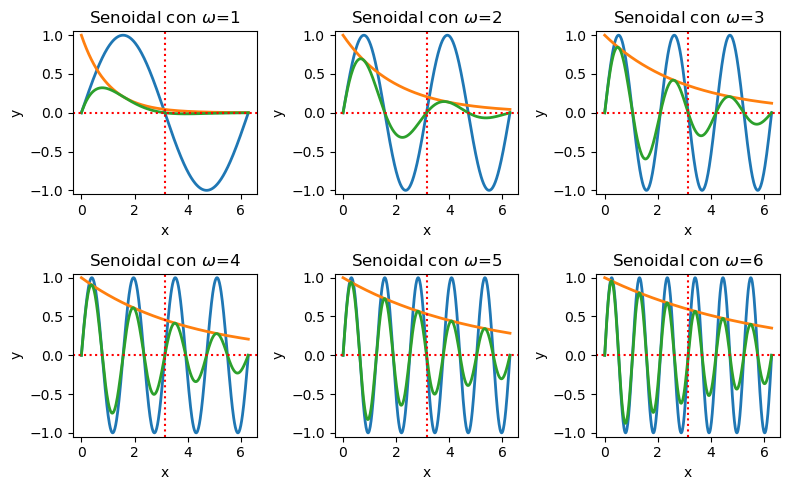

In [4]:
x, frec = np.linspace(0, 2 * np.pi, 400), [1, 2, 3, 4, 5, 6]
comments = {1:'Creamos una figura con 6 paneles, entra en una A4?',
            2:'Creamos una versión escueta del gráfico'}

opt = 1

if opt == 1:
    fig, axs = plt.subplots(2, 3, figsize=(8,5)) 
    axs = axs.flatten() 
    
    for ax, freq in zip(axs, frec):
        y = np.array([np.sin(freq * x),np.exp(-1/freq*x),np.sin(freq * x)*np.exp(-1/(freq)*x)])
        ax.plot(x, y.T, linewidth=2); ax.axhline(y=0., color='r', linestyle=':'); ax.axvline(x=np.pi, color='r', linestyle=':')
        ax.set(title=f'Senoidal con $\omega$={freq}',xlabel='x',ylabel='y',ylim=(-1.05,1.05))
    fig.tight_layout()
    
elif opt == 2:
    fig, axs = plt.subplots(2, 3, figsize=(8,5),sharex=True,sharey=True) 
    axs = axs.flatten() 
    
    for ax, freq in zip(axs, frec):
        y = np.array([np.sin(freq * x),np.exp(-1/freq*x),np.sin(freq * x)*np.exp(-1/(freq)*x)])
        ax.plot(x, y[:2].T, linewidth = 2,alpha=0.8); 
        ax.plot(x, y[-1], linewidth = 3);
        ax.axhline(y=0., color='r', linestyle=':'); ax.axvline(x=np.pi, color='r', linestyle=':')
        ax.set(xlabel='x',ylabel='y',ylim=(-1.05,1.05))
        #ax.text(0,0,'$\omega$={freq}',va='center',fontsize=30)
    plt.subplots_adjust(hspace=0,wspace=0)
    

print('Opcion',opt,comments[opt])
fig.savefig('fig3_'+str(opt)+'_.png',dpi=200)

## French Bakery Daily Sales Data Analysis: Croissants

El conjunto de datos pertenece a una panadería francesa. El conjunto de datos proporciona los detalles de las transacciones diarias de los clientes desde el 01/01/2021 hasta el 30/09/2022. 

<img src="f1.jpg" class="bg-primary mb-1" width="800px">

https://www.kaggle.com/code/timakh/french-bakery-sales-analysis

In [5]:
croissant_sales = np.load('french_bakery/croissant_sales.npz',allow_pickle=True)   # leemos el archivo con la información
date, time = croissant_sales['date'], croissant_sales['time']                      # cargamos las columnas en variables
date_time = date+' '+time
quantity, unit_price = croissant_sales['quantity'].astype(int), croissant_sales['unit_price'].astype(float)
date_format = '%Y-%m-%d %H:%M'
date_time = np.array([datetime.strptime(dt, date_format) for dt in date_time])       # el instante preciso de la compra del croissant

### Número de clientes por día

In [6]:
clientes_dia = (date_time - date_time.min()).astype('timedelta64[D]').astype(int)
dias, clientes = np.unique(clientes_dia, return_counts=True)

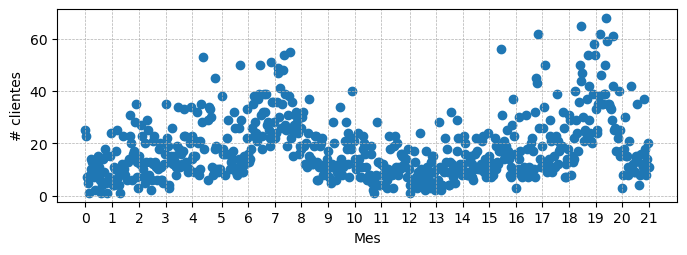

In [15]:
fig = plt.figure(figsize=(8,2.5))
ax = plt.gca()                  
ax.scatter(dias,clientes)
ax.set(xlabel='Mes',ylabel='# clientes') 
plt.xticks(dias[::30], range(len(dias[::30])))
ax.grid(True, linestyle='--', linewidth=0.5)
fig.savefig('fig4_.png')

### ¿Qué día se venden mas?

In [8]:
# creo la máscara que me señala el día de la semana
# días de la semana: 0 -> Lunes, 1 -> Martes, ... 
weekday = np.array([dt.weekday() for dt in date_time]); 
dia=dict(zip(['lun','mar','mie','jue','vie','sab','dom'],[weekday==d for d in range(7)] ))

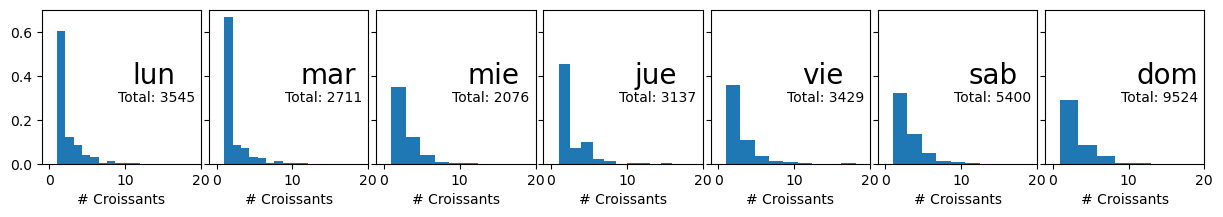

In [16]:
fig, axs = plt.subplots(1,7, figsize=(15,2),sharey=True) 

for ax, d in zip(axs, dia.keys()):
    #count, bin_edges = np.histogram(quantity[dia[d]])
    ax.hist(quantity[dia[d]],bins=10, density=True); 
    ax.set(xlabel='# Croissants',ylabel='',xlim=(-1.,20))
    ax.text(11,0.4,d,va='center',fontsize=20)
    ax.text(9,0.3,'Total: '+str(quantity[dia[d]].sum()),va='center',fontsize=10)

plt.subplots_adjust(hspace=0,wspace=0.05)
fig.savefig('fig5_.png')

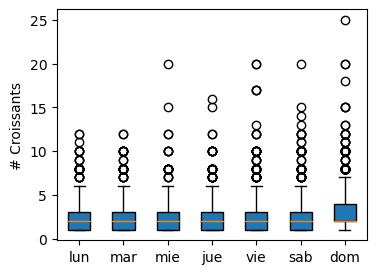

In [10]:
# Numero de croissants
data = [quantity[dia[d]] for d in dia.keys()]
plt.figure(figsize=(4,3))
plt.boxplot(data, vert=True, patch_artist=True); 
plt.ylabel('# Croissants')
plt.xticks(range(1,8), dia.keys())
fig.savefig('fig6_.png')

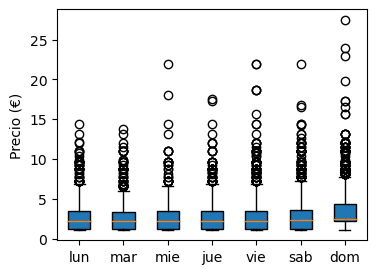

In [11]:
# Numero de croissant
data = [quantity[dia[d]]*unit_price[dia[d]] for d in dia.keys()] #1EU = 1621
plt.figure(figsize=(4,3))
plt.boxplot(data, vert=True, patch_artist=True); 
plt.ylabel('Precio (€)')
plt.xticks(range(1,8), dia.keys())
fig.savefig('fig7_.png')

## Sistemática, e.j.: Crecimiento del precio de un bien, marcamos los 10 valores más altos

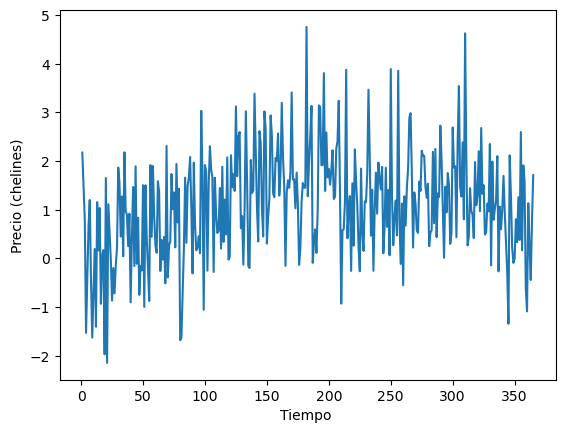

In [13]:
tiempo = np.arange(1,366)  # días
precio = 1.5*np.sin((2*np.pi/(850))*tiempo) + np.random.randn( len(tiempo) )

plt.plot(tiempo,precio)
plt.xlabel('Tiempo '); plt.ylabel('Precio (chelines)');

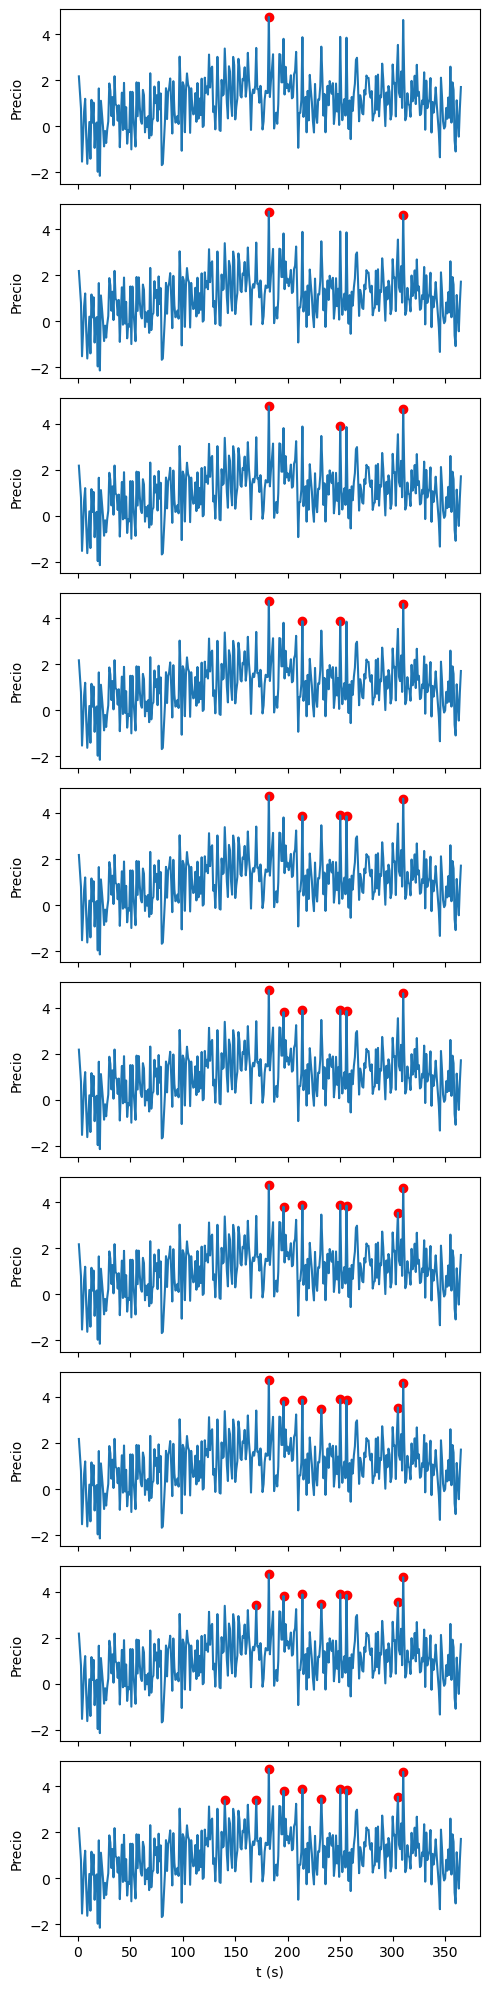

Sistemática


In [14]:
opt = 2

#
nval = 10

picos = np.argsort(precio)[::-1]  # posiciones de los picos más grandes

if opt==1:
    fig, axs = plt.subplots(nval, 1, figsize=(5,2*nval))
elif opt ==2:
    fig, axs = plt.subplots(nval, 1, figsize=(5,2*nval),sharex=True)
    
for i in range(nval):
    axs[i].plot(tiempo, precio) # subplot i
    axs[i].set( ylabel=r'Precio')

    
    # Agrego i puntos
    for j in range(i+1):
        axs[i].scatter(tiempo[picos[j]],precio[picos[j]], color='r') 

axs[i].set(xlabel='t (s)')        


plt.tight_layout()
plt.show()
print('Sistemática')